In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
def simpulate_points(a, b, max_noise):
    x = np.linspace(-3, 3, 20)
    y = a * x + b
    y_noise = np.random.uniform(-max_noise, max_noise, 20)
    y += y_noise
    return (x, y)

In [8]:
(x, y) = simpulate_points(3, 5, 4)

In [9]:
x_placeholder = tf.placeholder(tf.float32, [None], name = "x")
y_placeholder = tf.placeholder(tf.float32, [None], name = "y")

In [10]:
a = tf.Variable(tf.truncated_normal([]), name = "a")
b = tf.Variable(tf.constant(0, dtype = tf.float32), name = "b")

In [11]:
y_hat = tf.multiply(a, x_placeholder) + b
error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name = "MSE")

In [13]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(error)
init = tf.global_variables_initializer()

In [81]:
x_test = np.array([-5.0, 0.0, 5.0])
test_dict = { x_placeholder: x_test }
snapshots = []

In [82]:
sess = tf.Session()
sess.run(init)

for i  in range(100):
    feed_dict = {
        x_placeholder: x,
        y_placeholder: y
    }
    err, _ = sess.run([error, train], feed_dict = feed_dict)
    
    if i in [0, 1, 4, 10, 49, 99]:
        y_test = sess.run(y_hat, feed_dict = test_dict)
        snapshots.append((i, y_test))
        print str(i) + ":\tMSE %.3f" % err

0:	MSE 51.343
1:	MSE 32.466
4:	MSE 14.419
10:	MSE 7.945
49:	MSE 5.827
99:	MSE 5.827


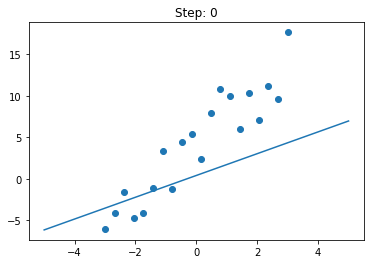

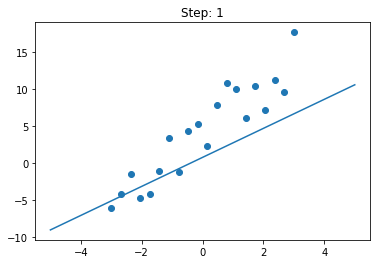

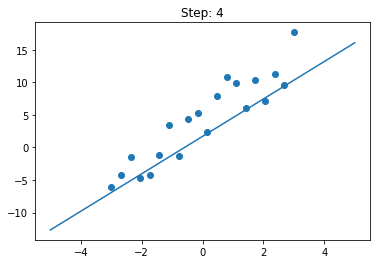

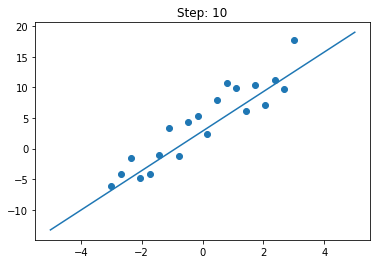

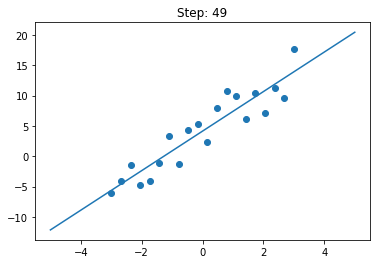

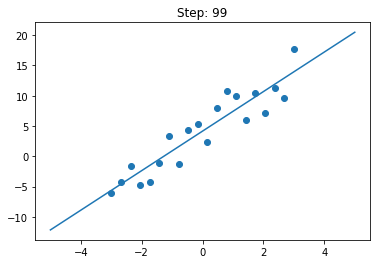

In [83]:
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title("Step: " + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test)

plt.show()